WARNING    /opt/conda/lib/python3.5/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/jovyan/.cache/cython/brian_extensions/_cython_magic_c623251294d243655f5ca77c558577cb.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]


Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in 4s
Starting simulation at t=53. ms for a duration of 50. ms
50. ms (100%) simulated in 2s
Velocity = 12.33 m/s


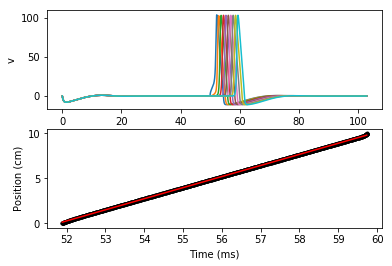

In [2]:
dir()

['ALLOW_THREADS',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'BUFSIZE',
 'BinomialFunction',
 'BrianLogger',
 'BrianObject',
 'BrianObjectException',
 'BrianPreference',
 'Button',
 'CLIP',
 'Circle',
 'Clock',
 'CodeRunner',
 'ComplexWarning',
 'Cylinder',
 'CythonCodeObject',
 'DAILY',
 'DEFAULT_CONSTANTS',
 'DEFAULT_FUNCTIONS',
 'DEFAULT_UNITS',
 'DataSource',
 'DateFormatter',
 'DateLocator',
 'DayLocator',
 'DimensionMismatchError',
 'EK',
 'ENa',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'El',
 'Equations',
 'EventMonitor',
 'ExplicitStateUpdater',
 'Expression',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'FR',
 'False_',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'Function',
 'Gamp',
 'Gcoulomb',
 'Gfarad',
 'Ggram',
 'Ggramme',
 'Ghertz',
 'Gjoule',
 'Gliter',
 'Glitre

In [1]:
from pyNN.neuron import *
from pyNN.neuron import HH_cond_exp
from pyNN.neuron import EIF_cond_exp_isfa_ista
from pyNN.neuron import Izhikevich

from pyNN import neuron
#
from pyNN.neuron import simulator as sim
from pyNN.neuron import setup as setup

from pyNN.neuron import DCSource
from types import MethodType


cryptography 2.2.1 requires asn1crypto>=0.21.0, which is not installed.
cffi 1.11.5 requires pycparser, which is not installed.
allensdk 0.14.2 has requirement pandas<0.20.0,>=0.16.2, but you'll have pandas 0.23.1 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/opt/conda/lib/python3.5/site-packages/pyNN/neuron/__init__.py:14: UserWarning: mpi4py not available
  warnings.warn("mpi4py not available")


In [2]:
import io
import math
import pdb
#from numba import jit
from contextlib import redirect_stdout
import numpy as np
#from .base import *
import quantities as qt
from quantities import mV, ms, s
import matplotlib.pyplot as plt
from pyNN.neuron import *
from pyNN.neuron import HH_cond_exp
from pyNN.neuron import EIF_cond_exp_isfa_ista
from pyNN.neuron import Izhikevich
from elephant.spike_train_generation import threshold_detection

from pyNN import neuron
#
#from pyNN.neuron import simulator as sim
from pyNN.neuron import setup as setup
#from pyNN.neuron import Izhikevich
#from pyNN.neuron import Population
from pyNN.neuron import DCSource
import numpy as np
import copy
from neo import AnalogSignal
import neuronunit.capabilities.spike_functions as sf

import neuronunit.capabilities as cap
cap.ReceivesCurrent
cap.ProducesActionPotentials
def bind_NU_interface(model):

    def load_model(self):
        neuron = None
        from pyNN import neuron
        self.hhcell = neuron.create(EIF_cond_exp_isfa_ista())
        neuron.setup(timestep=self.dt, min_delay=1.0)


    def init_backend(self, attrs = None, cell_name= 'HH_cond_exp', current_src_name = 'hannah', DTC = None, dt=0.01):
        backend = 'HHpyNN'
        self.current_src_name = current_src_name
        self.cell_name = cell_name
        self.adexp = True

        self.DCSource = DCSource
        self.setup = setup
        self.model_path = None
        self.related_data = {}
        self.lookup = {}
        self.attrs = {}
        self.neuron = neuron
        self.model._backend = str('ExternalSim')
        self.backend = self
        self.model.attrs = {}

        #self.orig_lems_file_path = 'satisfying'
        #self.model._backend.use_memory_cache = False
        #self.model.unpicklable += ['h','ns','_backend']
        self.dt = dt
        if type(DTC) is not type(None):
            if type(DTC.attrs) is not type(None):

                self.set_attrs(**DTC.attrs)
                assert len(self.model.attrs.keys()) > 0

            if hasattr(DTC,'current_src_name'):
                self._current_src_name = DTC.current_src_name

            if hasattr(DTC,'cell_name'):
                self.cell_name = DTC.cell_name
                
        self.load_model()

    def get_membrane_potential(self):
        """Must return a neo.core.AnalogSignal.
        And must destroy the hoc vectors that comprise it.
        """
        #dt = float(copy.copy(self.neuron.dt))
        data = self.hhcell.get_data().segments[0]
        volts = data.filter(name="v")[0]#/10.0
        #data_block = all_cells.get_data()

        vm = AnalogSignal(volts,
             units = mV,
             sampling_period = self.dt *ms)
        #results['vm'] = vm
        return vm#data.filter(name="v")[0]

    def _local_run(self):
        '''
        pyNN lazy array demands a minimum population size of 3. Why is that.
        '''
        results = {}
        DURATION = 1000.0
        
        #ctx_cells.celltype.recordable
        
        
        if self.celltype == 'HH_cond_exp':

            self.hhcell.record('spikes','v')

        else:
            self.neuron.record_v(self.hhcell, "Results/HH_cond_exp_%s.v" % str(neuron))

            #self.neuron.record_gsyn(self.hhcell, "Results/HH_cond_exp_%s.gsyn" % str(neuron))
        self.neuron.run(DURATION)
        data = self.hhcell.get_data().segments[0]
        volts = data.filter(name="v")[0]#/10.0
        #data_block = all_cells.get_data()

        vm = AnalogSignal(volts,
                     units = mV,
                     sampling_period = self.dt *ms)
        results['vm'] = vm
        results['t'] = vm.times # self.times
        results['run_number'] = results.get('run_number',0) + 1
        return results




    def set_attrs(self,**attrs):
        self.init_backend()
        self.model.attrs.update(attrs)
        assert type(self.model.attrs) is not type(None)
        self.hhcell[0].set_parameters(**attrs)
        return self


    def inject_square_current(self,current):
        attrs = copy.copy(self.model.attrs)
        self.init_backend()
        self.set_attrs(**attrs)
        c = copy.copy(current)
        if 'injected_square_current' in c.keys():
            c = current['injected_square_current']

        stop = float(c['delay'])+float(c['duration'])
        duration = float(c['duration'])
        start = float(c['delay'])
        amplitude = float(c['amplitude'])
        electrode = self.neuron.DCSource(start=start, stop=stop, amplitude=amplitude)


        electrode.inject_into(self.hhcell)
        self.results = self._local_run()
        self.vm = self.results['vm']

    def get_APs(self,vm):
        vm = self.get_membrane_potential()
        waveforms = sf.get_spike_waveforms(vm,threshold=-45.0*mV)
        return waveforms

    def get_spike_train(self,**run_params):
        vm = self.get_membrane_potential()

        spike_train = threshold_detection(vm,threshold=-45.0*mV)

        return spike_train
    
    def get_spike_count(self,**run_params):
        vm = self.get_membrane_potential()
        return len(threshold_detection(vm,threshold=-45.0*mV))
    
    model.init_backend = MethodType(init_backend,model)
    model.get_spike_count = MethodType(get_spike_count,model)
    model.get_APs = MethodType(get_APs,model)
    model.get_spike_train = MethodType(get_spike_train,model)
    model.set_attrs = MethodType(set_attrs, model) # Bind to the score.
    model.inject_square_current = MethodType(inject_square_current, model) # Bind to the score.
    model.set_attrs = MethodType(set_attrs, model) # Bind to the score.
    model.get_membrane_potential = MethodType(get_membrane_potential,model)
    model.load_model = MethodType(load_model, model) # Bind to the score.
    model._local_run = MethodType(_local_run,model)
    model.init_backend(model)
    #model.load_model() #= MethodType(load_model, model) # Bind to the score.

    return model
HH_cond_exp = bind_NU_interface(HH_cond_exp)    
#HH_cond_exp

In [3]:
electro_tests = []
obs_frame = {}
test_frame = {}
import os
import pickle
try: 

    electro_path = str(os.getcwd())+'all_tests.p'

    assert os.path.isfile(electro_path) == True
    with open(electro_path,'rb') as f:
        (obs_frame,test_frame) = pickle.load(f)

except:
    for p in pipe:
        p_tests, p_observations = get_neab.get_neuron_criteria(p)
        obs_frame[p["name"]] = p_observations#, p_tests))
        test_frame[p["name"]] = p_tests#, p_tests))
    electro_path = str(os.getcwd())+'all_tests.p'
    with open(electro_path,'wb') as f:
        pickle.dump((obs_frame,test_frame),f)

In [4]:
use_test = test_frame["Neocortex pyramidal cell layer 5-6"]
use_test[0].observation
#from neuronunit.tests import RheobaseP
from neuronunit.tests.fi import RheobaseTest# as discovery

rtp = RheobaseTest(use_test[0].observation)
use_test[0] = rtp


HH_cond_exp.attrs = HH_cond_exp.simple_parameters(HH_cond_exp)
#print(HH_cond_exp.attrs)
HH_cond_exp.scaled_parameters(HH_cond_exp)
dir(HH_cond_exp)
HH_cond_exp.default_initial_values
HH_cond_exp.attrs
NGEN = 10
MU = 10
from neuronunit.optimization import optimization_management as om
explore_ranges = {'e_rev_Na' : (40,70), 'e_rev_K': (-90.0,-75.0), 'cm' : (0.25,1.5)}
npcl, DO = om.run_ga(explore_ranges,NGEN,use_test,free_params=explore_ranges.keys(), NSGA = True, MU = MU,model_type=None)

#hc = 

NameError: name 'test_frame' is not defined

In [ ]:
#dir(HH_cond_exp)
#HH_cond_exp.get_parameters()
#hhcell[0].get_parameters()
#dir(HH_cond_exp)
HH_cond_exp.attrs = HH_cond_exp.simple_parameters(HH_cond_exp)
HH_cond_exp.celltype = HH_cond_exp
iparams = {}
iparams['injected_square_current'] = {}
#iparams['injected_square_current']['amplitude'] = 1.98156805*pq.pA
iparams['injected_square_current']['amplitude'] = 0.68156805*pq.pA

DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)

HH_cond_exp.inject_square_current(iparams)
print(HH_cond_exp.get_spike_count())

print(HH_cond_exp.vm)

import matplotlib.pyplot as plt
plt.plot(HH_cond_exp.vm.times,HH_cond_exp.vm)


plt.show()
iparams['injected_square_current']['amplitude'] = 0.8598156805*pq.pA
#iparams['injected_square_current']['amplitude'] = 2000.98156805*pq.pA

DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)

HH_cond_exp.inject_square_current(iparams)
print(HH_cond_exp.get_spike_count())
import matplotlib.pyplot as plt
plt.plot(HH_cond_exp.vm.times,HH_cond_exp.vm)

plt.show()
pred = use_test[0].generate_prediction(HH_cond_exp)


In [ ]:
#dir(HH_cond_exp)

In [ ]:
print(pred)

In [ ]:
iparams['injected_square_current']['amplitude'] = pred['value']
#iparams['injected_square_current']['amplitude'] = 2000.98156805*pq.pA

DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)

HH_cond_exp.inject_square_current(iparams)
print(HH_cond_exp.get_spike_count())
import matplotlib.pyplot as plt
plt.plot(HH_cond_exp.vm.times,HH_cond_exp.vm)


In [ ]:

import pyNN
from pyNN import neuron
from pyNN.neuron import EIF_cond_exp_isfa_ista
#neurons = pyNN.Population(N_CX, pyNN.EIF_cond_exp_isfa_ista, RS_parameters)

cell = neuron.create(EIF_cond_exp_isfa_ista())
#cell[0].set_parameters(**LTS_parameters)
cell[0].get_parameters()

In [ ]:


explore_ranges = {'E_Na' : (40,70), 'E_K': (-90.0,-75.0), 'C_m' : (0.25,1.5), 'g_K':(30,40), 'g_Na':(100,140), 'g_L':(0.1,0.5), 'E_L':(-60.0,-45)}

attrs = { 'g_K' : 36.0, 'g_Na' : 120.0, 'g_L' : 0.3, \
         'C_m' : 1.0, 'E_L' : -54.387, 'E_K' : -77.0, 'E_Na' : 50.0, 'vr':-65.0 } 

    
from neuronunit.optimization import optimization_management as om
print(test_frame)    
MU = 12
NGEN = 25
cnt = 1
#hc = { 'g_L' : 0.3, 'E_L' : -54.387,
hc = {'vr':-65.0 } 

#npcl, DO = om.run_g
npcl, DO = om.run_ga(explore_ranges,NGEN,use_test,free_params=explore_ranges.keys(), hc = hc, NSGA = True, MU = MU,model_type='HH')
    